# 1. 데이터 전처리와 EDA(탐색적 데이터 분석)
## 1) 데이터 전처리란?
* 분석할 데이터 원본을 머신러닝 및 딥러닝을 할 수 있도록 준비하는 과정
  * 데이터 타입 변환(문자/숫자)
  * 결측값 처리 - 삭제/대치
  * 이상값 탐지 - 표준편차 3% 이하 97% 이상 되는 값들, 4분위수 25% - IQR*1.5미만이거나 75% + IQR*1.5초과인 값
  * 구간화
  * 정규화/표준화
  * 카테고리 변수(범주형) 레이블 인코딩(더미변수화, 원핫인코딩)
  * 종속변수의 클래스 편향 수정(클래스 불균형 문제 해결)
  * EDA를 통한 특성 생성 및 삭제

## 2) 데이터 전처리는 머신러닝을 통해 도출되는 모델의 성능에 직접적인 영향을 끼치는 중요요소.
* Garbage in Garbage out

In [562]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [737]:
data = pd.read_csv("https://raw.githubusercontent.com/haram4th/ablearn/main/Taitanic_train.csv")

In [564]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [565]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# 데이터 전처리 없이 분석을 시도할 경우 생기는 일

In [566]:
data2 = data.copy()

In [567]:
X2 = data2.drop('Survived', axis=1) # 독립변수를 만들기 위해 Target(종속변수) 삭제 후 X2에 저장
y2 = data2['Survived'] # 종속 변수만 y에 저장

In [568]:
X2.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [569]:
y2.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

## 홀드아웃 (훈련데이터 / 테스트 데이터로 나눔) 8 : 2

In [570]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=77)

In [571]:
X_train2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 32 to 727
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Pclass       712 non-null    int64  
 2   Name         712 non-null    object 
 3   Sex          712 non-null    object 
 4   Age          570 non-null    float64
 5   SibSp        712 non-null    int64  
 6   Parch        712 non-null    int64  
 7   Ticket       712 non-null    object 
 8   Fare         712 non-null    float64
 9   Cabin        167 non-null    object 
 10  Embarked     712 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 66.8+ KB


In [572]:
X_test2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 179 entries, 100 to 446
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  179 non-null    int64  
 1   Pclass       179 non-null    int64  
 2   Name         179 non-null    object 
 3   Sex          179 non-null    object 
 4   Age          144 non-null    float64
 5   SibSp        179 non-null    int64  
 6   Parch        179 non-null    int64  
 7   Ticket       179 non-null    object 
 8   Fare         179 non-null    float64
 9   Cabin        37 non-null     object 
 10  Embarked     177 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 16.8+ KB


In [573]:
# from sklearn.metrics import accuracy_score
# model2 = DecisionTreeClassifier(max_depth=3, random_state=7)
# model2.fit(X_train2, y_train2)
# pred2 = model2.predict(X_test2)
# print(accuracy_score(y_test2, pred2))

In [574]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [575]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [576]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# 2 결측값 확인 및 처리
* 결측값은 존재하지 않는 데이터를 의미
* NA(Not Available), NaN(Not a Number), Null, 공백, -1로 표시됨
* 결측값은 삭제하는 것이 일반적
* 결측값을 무조건 삭제하면 다른 데이터도 같이 삭제되기 때문에 데이터 손실이 커질 수 있다.
* 결측값을 무조건 삭제하는 것이 아니라 보간해서 결측값을 메우는 작업을 해 줌

In [577]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [578]:
data.dropna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


## 1) 평균 대치법: 컬럼에 있는 데이터 값의 평균으로 결측값 대치

### fillna(대치값)

In [579]:
data['Age'].mean()

29.69911764705882

In [580]:
# fillna(대치값) 평균
data['Age'].fillna(data['Age'].mean()).tail()

886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, dtype: float64

In [581]:
# fillna(대치값) 중앙값
data['Age'].fillna(data['Age'].median()).tail()

886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: Age, dtype: float64

In [582]:
data['Age'].value_counts()

Age
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: count, Length: 88, dtype: int64

In [583]:
# fillna(대치값) 최빈값
data['Age'].fillna(24.00).tail()

886    27.0
887    19.0
888    24.0
889    26.0
890    32.0
Name: Age, dtype: float64

### (1) Scikit-learn의 SimpleImputer로 평균, 중앙, 최빈값으로 대치

In [584]:
from sklearn.impute import SimpleImputer

* mean값으로 대치

In [585]:
na_indices = data[data['Age'].isna() == True].index

In [586]:
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mean.fit_transform(data['Age'].values.reshape(-1,1))[:,0]

array([22.        , 38.        , 26.        , 35.        , 35.        ,
       29.69911765, 54.        ,  2.        , 27.        , 14.        ,
        4.        , 58.        , 20.        , 39.        , 14.        ,
       55.        ,  2.        , 29.69911765, 31.        , 29.69911765,
       35.        , 34.        , 15.        , 28.        ,  8.        ,
       38.        , 29.69911765, 19.        , 29.69911765, 29.69911765,
       40.        , 29.69911765, 29.69911765, 66.        , 28.        ,
       42.        , 29.69911765, 21.        , 18.        , 14.        ,
       40.        , 27.        , 29.69911765,  3.        , 19.        ,
       29.69911765, 29.69911765, 29.69911765, 29.69911765, 18.        ,
        7.        , 21.        , 49.        , 29.        , 65.        ,
       29.69911765, 21.        , 28.5       ,  5.        , 11.        ,
       22.        , 38.        , 45.        ,  4.        , 29.69911765,
       29.69911765, 29.        , 19.        , 17.        , 26.  

In [587]:
n = np.arange(24)
n

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

In [588]:
n.reshape(-1, 4)

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23]])

In [589]:
data.iloc[na_indices]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


* median으로 대치

In [590]:
imp_median = SimpleImputer(missing_values=np.nan, strategy='median')
imp_median.fit_transform(data['Age'].values.reshape(-1,1))[:,0]

array([22.  , 38.  , 26.  , 35.  , 35.  , 28.  , 54.  ,  2.  , 27.  ,
       14.  ,  4.  , 58.  , 20.  , 39.  , 14.  , 55.  ,  2.  , 28.  ,
       31.  , 28.  , 35.  , 34.  , 15.  , 28.  ,  8.  , 38.  , 28.  ,
       19.  , 28.  , 28.  , 40.  , 28.  , 28.  , 66.  , 28.  , 42.  ,
       28.  , 21.  , 18.  , 14.  , 40.  , 27.  , 28.  ,  3.  , 19.  ,
       28.  , 28.  , 28.  , 28.  , 18.  ,  7.  , 21.  , 49.  , 29.  ,
       65.  , 28.  , 21.  , 28.5 ,  5.  , 11.  , 22.  , 38.  , 45.  ,
        4.  , 28.  , 28.  , 29.  , 19.  , 17.  , 26.  , 32.  , 16.  ,
       21.  , 26.  , 32.  , 25.  , 28.  , 28.  ,  0.83, 30.  , 22.  ,
       29.  , 28.  , 28.  , 17.  , 33.  , 16.  , 28.  , 23.  , 24.  ,
       29.  , 20.  , 46.  , 26.  , 59.  , 28.  , 71.  , 23.  , 34.  ,
       34.  , 28.  , 28.  , 21.  , 33.  , 37.  , 28.  , 21.  , 28.  ,
       38.  , 28.  , 47.  , 14.5 , 22.  , 20.  , 17.  , 21.  , 70.5 ,
       29.  , 24.  ,  2.  , 21.  , 28.  , 32.5 , 32.5 , 54.  , 12.  ,
       28.  , 24.  ,

* 최빈값으로 대치

In [591]:
imp_median = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp_median.fit_transform(data['Age'].values.reshape(-1,1))[:,0]

array([22.  , 38.  , 26.  , 35.  , 35.  , 24.  , 54.  ,  2.  , 27.  ,
       14.  ,  4.  , 58.  , 20.  , 39.  , 14.  , 55.  ,  2.  , 24.  ,
       31.  , 24.  , 35.  , 34.  , 15.  , 28.  ,  8.  , 38.  , 24.  ,
       19.  , 24.  , 24.  , 40.  , 24.  , 24.  , 66.  , 28.  , 42.  ,
       24.  , 21.  , 18.  , 14.  , 40.  , 27.  , 24.  ,  3.  , 19.  ,
       24.  , 24.  , 24.  , 24.  , 18.  ,  7.  , 21.  , 49.  , 29.  ,
       65.  , 24.  , 21.  , 28.5 ,  5.  , 11.  , 22.  , 38.  , 45.  ,
        4.  , 24.  , 24.  , 29.  , 19.  , 17.  , 26.  , 32.  , 16.  ,
       21.  , 26.  , 32.  , 25.  , 24.  , 24.  ,  0.83, 30.  , 22.  ,
       29.  , 24.  , 28.  , 17.  , 33.  , 16.  , 24.  , 23.  , 24.  ,
       29.  , 20.  , 46.  , 26.  , 59.  , 24.  , 71.  , 23.  , 34.  ,
       34.  , 28.  , 24.  , 21.  , 33.  , 37.  , 28.  , 21.  , 24.  ,
       38.  , 24.  , 47.  , 14.5 , 22.  , 20.  , 17.  , 21.  , 70.5 ,
       29.  , 24.  ,  2.  , 21.  , 24.  , 32.5 , 32.5 , 54.  , 12.  ,
       24.  , 24.  ,

### (2) K-최근접이웃(KNN)을 활용해서 결측값 대치
* 단순확률대치법

In [592]:
from sklearn.impute import KNNImputer

In [593]:
KNN_imputer = KNNImputer(n_neighbors=1)
data['Age'] = KNN_imputer.fit_transform(data['Age'].values.reshape(-1,1))[:,0]

In [594]:
data.iloc[na_indices]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,29.699118,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,29.699118,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,29.699118,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,29.699118,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,29.699118,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,29.699118,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,29.699118,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,29.699118,0,0,349217,7.8958,NaN,S


In [595]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### 컬럼내 결측값이 전체 데이터의 50%가 넘으면 열 자체를 삭제

In [596]:
data['Cabin'].isna().sum()

687

In [597]:
687/891*100

77.10437710437711

* 컬럼 삭제하기
  * 데이터프레임.drop('컬럼명', axis=1)
* 행 삭제하기
  * 데이터프레임.drop(인덱스)
* inplace = True (재할당 없이 바로 반영)

In [598]:
data = data.drop('Cabin', axis=1)

In [599]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


In [600]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [601]:
data['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [602]:
data['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [603]:
data['Embarked'] = data['Embarked'].fillna("S")

In [604]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


## 이상값 탐지 및 처리

In [605]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<Axes: >

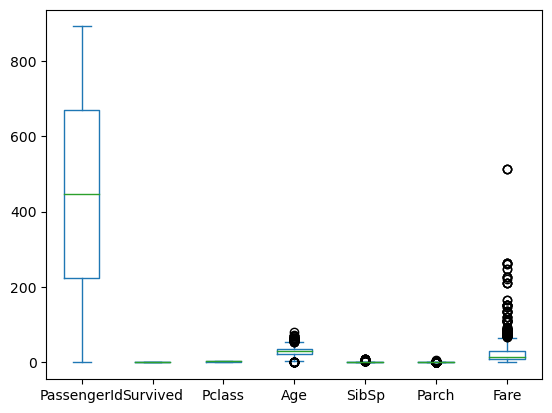

In [606]:
data.plot(kind='box')

<Axes: >

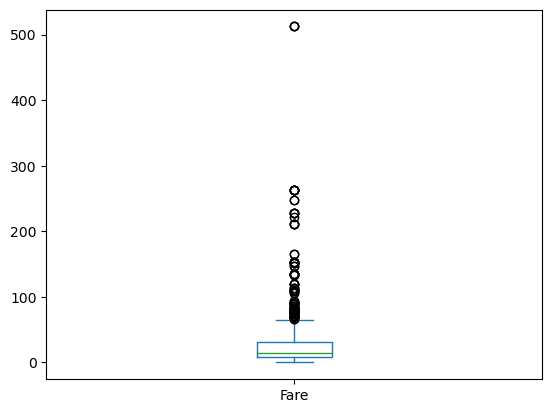

In [607]:
data['Fare'].plot(kind='box')

In [608]:
x = data.describe()

In [609]:
x

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [610]:
# IQR
print(x.loc['25%'] - ((x.loc['75%'] - x.loc['25%']) * 1.5)) # 하한 최소값
print(x.loc['75%'] + ((x.loc['75%'] - x.loc['25%']) * 1.5)) # 상한 최대값

PassengerId   -444.000
Survived        -1.500
Pclass           0.500
Age              2.500
SibSp           -1.500
Parch            0.000
Fare           -26.724
dtype: float64
PassengerId    1336.0000
Survived          2.5000
Pclass            4.5000
Age              54.5000
SibSp             2.5000
Parch             0.0000
Fare             65.6344
dtype: float64


In [611]:
out_min = x.loc['25%'] - ((x.loc['75%'] - x.loc['25%']) *1.5) # 하한 최소값
out_max = x.loc['75%'] + ((x.loc['75%'] - x.loc['25%']) *1.5) # 상한 최대값

In [612]:
x

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [613]:
ol_result = pd.DataFrame([out_max, out_min], columns=out_max.index, index=['상한값','하한값'])
ol_result

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
상한값,1336.0,2.5,4.5,54.5,2.5,0.0,65.6344
하한값,-444.0,-1.5,0.5,2.5,-1.5,0.0,-26.7240


In [614]:
result = pd.concat([x, ol_result])
result

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200
상한값,1336.000000,2.500000,4.500000,54.500000,2.500000,0.000000,65.634400
하한값,-444.000000,-1.500000,0.500000,2.500000,-1.500000,0.000000,-26.724000


In [615]:
# 아웃라이어를 계산하는 함수
def outlier(x):
    x = x.describe()
    out_max = x.loc['75%'] + (1.5 * (x.loc['75%'] - x.loc['25%']))
    out_min = x.loc['25%'] - (1.5 * (x.loc['75%'] - x.loc['25%']))
    ol_result = pd.DataFrame([out_max, out_min], columns=out_max.index, index=['상한값', '하한값'])
    result = pd.concat([x, ol_result])
    return result
    

In [616]:
outlier(data)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200
상한값,1336.000000,2.500000,4.500000,54.500000,2.500000,0.000000,65.634400
하한값,-444.000000,-1.500000,0.500000,2.500000,-1.500000,0.000000,-26.724000


* Fare 컬럼에 이상값이 있음
* 4분위수로 계산해서 상한 최대값 이상인 컬럼만 필터링


In [617]:
data[data['Fare'] > 65.634400]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.000000,3,2,19950,263.0000,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,29.699118,1,0,PC 17569,146.5208,C
34,35,0,1,"Meyer, Mr. Edgar Joseph",male,28.000000,1,0,PC 17604,82.1708,C
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.000000,1,0,PC 17572,76.7292,C
...,...,...,...,...,...,...,...,...,...,...,...
846,847,0,3,"Sage, Mr. Douglas Bullen",male,29.699118,8,2,CA. 2343,69.5500,S
849,850,1,1,"Goldenberg, Mrs. Samuel L (Edwiga Grabowska)",female,29.699118,1,0,17453,89.1042,C
856,857,1,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",female,45.000000,1,1,36928,164.8667,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,29.699118,8,2,CA. 2343,69.5500,S


* 필터링 결과 Fare가 이상값을 갖는 데이터는 SibSp, Parch 컬럼에 1 이상의 데이터가 있음
* SibSp: 형제, 자매 수, Parch: 부모자식
* 형제 자매나 부모 자식이 있는 경우 표를 1사람이 다른 가족 구성원의 것 까지 같이 구매했을 가능성이 있음
* SibSp, Parch를 family 컬럼으로 합치고 Fare를 그 수로 나누면 정상적인 fare 가격 산출 가능

### SibSp, Parch를 family 컬럼으로 합치기 (파생변수 만들기)

In [618]:
data['family'] = data['SibSp'] + data['Parch'] + 1
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1


### fare를 family 수로 나누어 표 1개의 가격 산출해 adj_fare 컬럼 생성

In [619]:
data['adj_fare'] = data['Fare'] / data['family']
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,family,adj_fare
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2,3.62500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2,35.64165
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,7.92500
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,2,26.55000
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,8.05000


In [620]:
outlier(data)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,family,adj_fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,1.904602,19.916375
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429,1.613459,35.841257
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,1.000000,7.250000
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200,1.000000,8.300000
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,2.000000,23.666667
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,11.000000,512.329200
상한값,1336.000000,2.500000,4.500000,54.500000,2.500000,0.000000,65.634400,3.500000,48.291667
하한값,-444.000000,-1.500000,0.500000,2.500000,-1.500000,0.000000,-26.724000,-0.500000,-17.375000


In [621]:
data[data['adj_fare'] == 512.329200]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,family,adj_fare
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,C,1,512.3292
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,C,1,512.3292


In [622]:
891 - data['Ticket'].nunique()

210

In [623]:
512.3292 / 2

256.1646

* 가장 비싼 1등실 가격은 256.1646

## Feature Engineering, Feature Selection
* 변수선택
* 파생변수 생성

In [624]:
data[(data['Pclass'] == 1)]['adj_fare'].median()

33.760400000000004

* Fare는 불확실성이 커서 사용 불가
* Ticket, Fare, adj_fare 사용 불가

# 분석 목적: 고객 정보를 통해 생존 여부 판별
* target변수(종속변수): Survived

* 분석에 사용할 변수 선택

In [625]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'family', 'adj_fare'],
      dtype='object')

In [626]:
data = data[['Survived', 'Pclass', 'Sex', 'Age', 'Embarked', 'family']]
data.head()

,Survived,Pclass,Sex,Age,Embarked,family
0,0,3,male,22.0,S,2
1,1,1,female,38.0,C,2
2,1,3,female,26.0,S,1
3,1,1,female,35.0,S,2
4,0,3,male,35.0,S,1


### groupby를 통해서 독립변수와 종속변수의 관계 파악

In [627]:
data.groupby(['Pclass'])['Survived'].value_counts(sort=False)

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: count, dtype: int64

<Axes: xlabel='Pclass,Survived'>

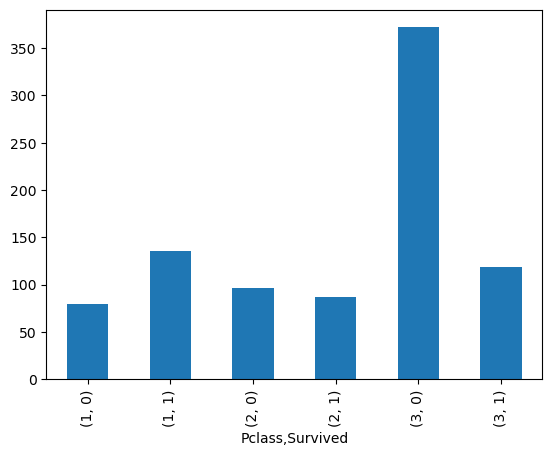

In [628]:
data.groupby(['Pclass'])['Survived'].value_counts(sort=False).plot(kind='bar')

* Pclass별 생존율 구하기

In [629]:
# Pclass가 1일 때 생존율 63%
136 / (80+136) * 100

62.96296296296296

In [630]:
# Pclass가 2일 때 생존율 47%
87 / (97 + 87) * 100    

47.28260869565217

In [631]:
# Pclass가 3일 때 생존율 24%
119 / (119+372) * 100

24.236252545824847

* Pclass가 높으면(1등급) 생존율이 높다.

In [632]:
data.groupby('Sex')['Survived'].value_counts(sort=False)

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: count, dtype: int64

In [633]:
# 여성일 때의 생존율 74%
233 / (81 + 233) * 100

74.20382165605095

In [634]:
# 남성일 때의 생존율 19%
109 / (109 + 468) * 100

18.890814558058924

* 여성인 경우 남성보다 생존율이 높다.

In [635]:
data['Age'].nunique()

89

### 나이를 구간화 하고 생존율과의 관계 알아보기

In [636]:
data['Age'].describe()

count    891.000000
mean      29.699118
std       13.002015
min        0.420000
25%       22.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [637]:
def age_dist(age):
    if 0 <= age < 10:
        return 'under10s'
    elif 10 <= age < 20:
        return '10s'
    elif 20 <= age < 30:
        return '20s'
    elif 30 <= age < 40:
        return '30s'
    elif 40 <= age < 50:
        return '40s'
    elif 50 <= age < 60:
        return '50s'
    elif 60 <= age < 70:
        return '60s'
    elif 70 <= age < 80:
        return '70s'
    elif 80 <= age < 90:
        return '80s'


In [638]:
# 0 ~ 9, 10 ~19, 20 ~ 29, 30 ~ 39 ... 나이를 구간화

# data.loc[:, 'Age'] = data['Age'].apply(age_dist)
# data['Age'] = data['Age'].apply(age_dist)

In [639]:
data['Age']

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

### cut함수를 사용해 나이의 구간 나누기

In [640]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 81]
data['Age'] = pd.cut(data['Age'], bins, right=False)

C:\Users\hi\AppData\Local\Temp\ipykernel_11768\2937003816.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Age'] = pd.cut(data['Age'], bins, right=False)


In [641]:
data['Age'].value_counts()

Age
[20, 30)    397
[30, 40)    167
[10, 20)    102
[40, 50)     89
[0, 10)      62
[50, 60)     48
[60, 70)     19
[70, 81)      7
Name: count, dtype: int64

<Axes: xlabel='Age,Survived'>

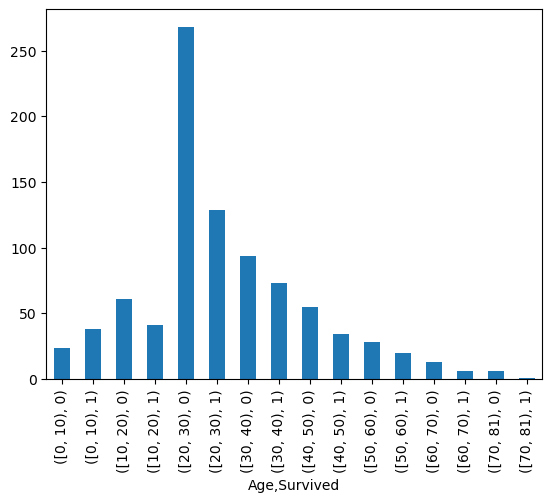

In [642]:
data.groupby('Age')['Survived'].value_counts(sort=False).plot(kind='bar')

In [643]:
data.groupby('Age')['Survived'].value_counts(sort=False)

Age       Survived
[0, 10)   0            24
          1            38
[10, 20)  0            61
          1            41
[20, 30)  0           268
          1           129
[30, 40)  0            94
          1            73
[40, 50)  0            55
          1            34
[50, 60)  0            28
          1            20
[60, 70)  0            13
          1             6
[70, 81)  0             6
          1             1
Name: count, dtype: int64

## 나이에 따른 생존율 컬럼 추가하기

In [644]:
agedata = data.groupby('Age')['Survived'].value_counts(sort=False)

In [645]:
surv_ratio_result = {}
for idx2, i in zip(agedata.index, agedata):
    if idx2[1] == 0:
        dead = i
    elif idx2[1] == 1:
        surv = i
        surv_ratio = surv / (dead+surv) * 100
        print(f"{idx2[0]}의 생존율: ", surv_ratio)
        surv_ratio_result[idx2[0]] = surv_ratio
surv_ratio_result

[0, 10)의 생존율:  61.29032258064516
[10, 20)의 생존율:  40.19607843137255
[20, 30)의 생존율:  32.49370277078086
[30, 40)의 생존율:  43.712574850299404
[40, 50)의 생존율:  38.20224719101123
[50, 60)의 생존율:  41.66666666666667
[60, 70)의 생존율:  31.57894736842105
[70, 81)의 생존율:  14.285714285714285


{Interval(0, 10, closed='left'): 61.29032258064516,
 Interval(10, 20, closed='left'): 40.19607843137255,
 Interval(20, 30, closed='left'): 32.49370277078086,
 Interval(30, 40, closed='left'): 43.712574850299404,
 Interval(40, 50, closed='left'): 38.20224719101123,
 Interval(50, 60, closed='left'): 41.66666666666667,
 Interval(60, 70, closed='left'): 31.57894736842105,
 Interval(70, 81, closed='left'): 14.285714285714285}

In [646]:
data.head()

,Survived,Pclass,Sex,Age,Embarked,family
0,0,3,male,"[20, 30)",S,2
1,1,1,female,"[30, 40)",C,2
2,1,3,female,"[20, 30)",S,1
3,1,1,female,"[30, 40)",S,2
4,0,3,male,"[30, 40)",S,1


In [648]:
# Age에서 연령대를 추출
# surv_ratio_result에서 Age 연령대에 해당하는 생존율 추출
# surv_ratio 컬럼을 만들어 연령대별 생존율 입력
data.loc[:, 'serv_ratio_by_age'] = data.loc[:,'Age'].apply(lambda x: surv_ratio_result[x])
data.head()

,Survived,Pclass,Sex,Age,Embarked,family,serv_ratio_by_age
0,0,3,male,"[20, 30)",S,2,32.493703
1,1,1,female,"[30, 40)",C,2,43.712575
2,1,3,female,"[20, 30)",S,1,32.493703
3,1,1,female,"[30, 40)",S,2,43.712575
4,0,3,male,"[30, 40)",S,1,43.712575


* 나이는 생존율과 관련이 있다. 10세 미만인 경우와 80세 초과인 경우 생존율이 높다.

## Pcalss별 sex 별 생존율

In [650]:
data.groupby(["Pclass", "Sex"])["Survived"].value_counts(sort=False)

Pclass  Sex     Survived
1       female  0             3
                1            91
        male    0            77
                1            45
2       female  0             6
                1            70
        male    0            91
                1            17
3       female  0            72
                1            72
        male    0           300
                1            47
Name: count, dtype: int64

<Axes: xlabel='Pclass,Sex,Survived'>

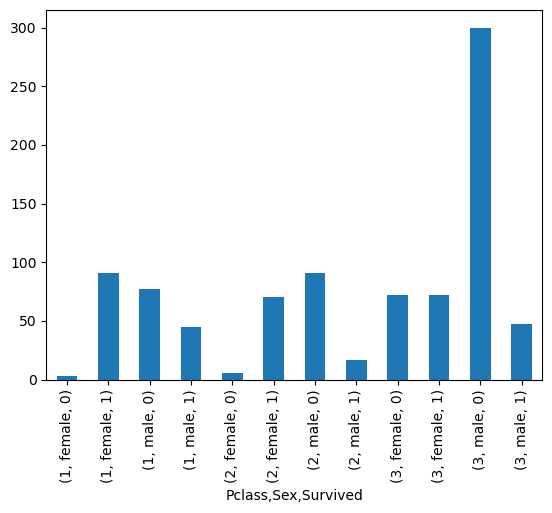

In [651]:
data.groupby(["Pclass", "Sex"])["Survived"].value_counts(sort=False).plot(kind='bar')

In [660]:
print('1등실 여성: ', 91 / (91+3) *100)
print('2등실 여성: ', 70 / (70+6) *100)
print('3등실 여성: ', 72 /(72+72) *100)

1등실 여성:  96.80851063829788
2등실 여성:  92.10526315789474
3등실 여성:  50.0


In [662]:
print('1등실 남성: ', 45 / (45+77)*100)
print('2등실 남성: ', 17 / (17+91)*100)
print('3등실 남성: ', 47 / (47+300)*100)

1등실 남성:  36.885245901639344
2등실 남성:  15.74074074074074
3등실 남성:  13.544668587896252


In [663]:
data.head()

,Survived,Pclass,Sex,Age,Embarked,family,serv_ratio_by_age
0,0,3,male,"[20, 30)",S,2,32.493703
1,1,1,female,"[30, 40)",C,2,43.712575
2,1,3,female,"[20, 30)",S,1,32.493703
3,1,1,female,"[30, 40)",S,2,43.712575
4,0,3,male,"[30, 40)",S,1,43.712575


### Embarked에 따른 생존율

In [664]:
data.groupby('Embarked')['Survived'].value_counts(sort=False)

Embarked  Survived
C         0            75
          1            93
Q         0            47
          1            30
S         0           427
          1           219
Name: count, dtype: int64

<Axes: xlabel='Embarked,Survived'>

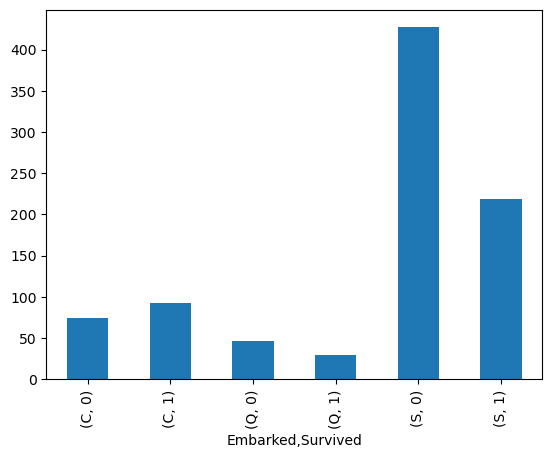

In [665]:
data.groupby('Embarked')['Survived'].value_counts(sort=False).plot(kind='bar')

In [668]:
print('embarked C: ', 93 / (93+75) *100)
print('embarked Q: ', 30 / (30+47) *100)
print('embarked S: ', 219 / (219+427) *100)

embarked C:  55.35714285714286
embarked Q:  38.961038961038966
embarked S:  33.90092879256966


In [670]:
data['Embarked'].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

## family 에 따른 생존율

In [671]:
data.groupby("family")['Survived'].value_counts()

family  Survived
1       0           374
        1           163
2       1            89
        0            72
3       1            59
        0            43
4       1            21
        0             8
5       0            12
        1             3
6       0            19
        1             3
7       0             8
        1             4
8       0             6
11      0             7
Name: count, dtype: int64

<Axes: xlabel='family,Survived'>

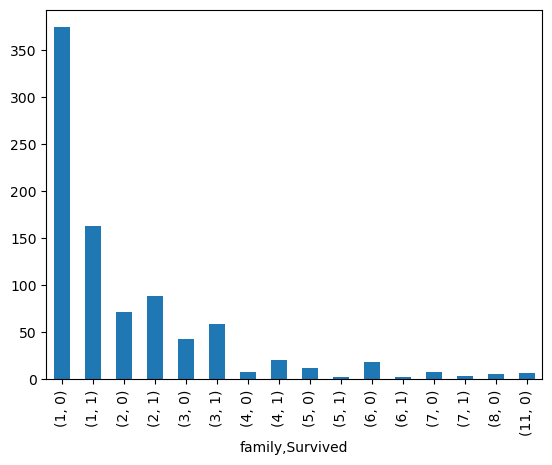

In [673]:
data.groupby("family")['Survived'].value_counts(sort=False).plot(kind='bar')

# 파생변수, 더미변수 만들기

In [674]:
data.head()

,Survived,Pclass,Sex,Age,Embarked,family,serv_ratio_by_age
0,0,3,male,"[20, 30)",S,2,32.493703
1,1,1,female,"[30, 40)",C,2,43.712575
2,1,3,female,"[20, 30)",S,1,32.493703
3,1,1,female,"[30, 40)",S,2,43.712575
4,0,3,male,"[30, 40)",S,1,43.712575


## 카테고리변수 처리에 따라 3가지 데이터셋 생성
* data1 - pclass를 현재 그대로 유지 나머지를 더미변수화
* data2 - pclass를 서열변수로 처리해 1 -> 3,  3 -> 1로 변경
* data3 - pclass를 더미변수화

In [675]:
data1 = data.copy()
data2 = data.copy()
data3 = data.copy()

In [678]:
data1 = pd.get_dummies(data1, columns=['Sex', 'Age', 'Embarked'], drop_first=True)

In [679]:
data1.head(2)

,Survived,Pclass,family,serv_ratio_by_age,Sex_male,"Age_[10, 20)","Age_[20, 30)","Age_[30, 40)","Age_[40, 50)","Age_[50, 60)","Age_[60, 70)","Age_[70, 81)",Embarked_Q,Embarked_S
0,0,3,2,32.493703,True,False,True,False,False,False,False,False,False,True
1,1,1,2,43.712575,False,False,False,True,False,False,False,False,False,False


In [683]:
# Pclass의 1이 서열이 가장 높으므로 1에 높은 숫자 부여 1 -> 3, 3 -> 1 
data2['Pclass'] = data2['Pclass'].replace({1:3, 3:1})  

In [684]:
data2.head(2)

,Survived,Pclass,Sex,Age,Embarked,family,serv_ratio_by_age
0,0,3,male,"[20, 30)",S,2,32.493703
1,1,1,female,"[30, 40)",C,2,43.712575


In [685]:
data2 = pd.get_dummies(data2, columns=['Sex', 'Age', 'Embarked'], drop_first=True)
data2.head()

,Survived,Pclass,family,serv_ratio_by_age,Sex_male,"Age_[10, 20)","Age_[20, 30)","Age_[30, 40)","Age_[40, 50)","Age_[50, 60)","Age_[60, 70)","Age_[70, 81)",Embarked_Q,Embarked_S
0,0,3,2,32.493703,True,False,True,False,False,False,False,False,False,True
1,1,1,2,43.712575,False,False,False,True,False,False,False,False,False,False
2,1,3,1,32.493703,False,False,True,False,False,False,False,False,False,True
3,1,1,2,43.712575,False,False,False,True,False,False,False,False,False,True
4,0,3,1,43.712575,True,False,False,True,False,False,False,False,False,True


In [687]:
data3 = pd.get_dummies(data3, columns=['Pclass', 'Sex', 'Age', 'Embarked'], drop_first=True)
data3.head(2)

,Survived,family,serv_ratio_by_age,Pclass_2,Pclass_3,Sex_male,"Age_[10, 20)","Age_[20, 30)","Age_[30, 40)","Age_[40, 50)","Age_[50, 60)","Age_[60, 70)","Age_[70, 81)",Embarked_Q,Embarked_S
0,0,2,32.493703,False,True,True,False,True,False,False,False,False,False,False,True
1,1,2,43.712575,False,False,False,False,False,True,False,False,False,False,False,False


In [688]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Survived           891 non-null    int64   
 1   Pclass             891 non-null    int64   
 2   family             891 non-null    int64   
 3   serv_ratio_by_age  891 non-null    category
 4   Sex_male           891 non-null    bool    
 5   Age_[10, 20)       891 non-null    bool    
 6   Age_[20, 30)       891 non-null    bool    
 7   Age_[30, 40)       891 non-null    bool    
 8   Age_[40, 50)       891 non-null    bool    
 9   Age_[50, 60)       891 non-null    bool    
 10  Age_[60, 70)       891 non-null    bool    
 11  Age_[70, 81)       891 non-null    bool    
 12  Embarked_Q         891 non-null    bool    
 13  Embarked_S         891 non-null    bool    
dtypes: bool(10), category(1), int64(3)
memory usage: 30.9 KB


In [690]:
data1['serv_ratio_by_age'] = data1['serv_ratio_by_age'].apply(int)

In [691]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Survived           891 non-null    int64   
 1   Pclass             891 non-null    int64   
 2   family             891 non-null    int64   
 3   serv_ratio_by_age  891 non-null    category
 4   Sex_male           891 non-null    bool    
 5   Age_[10, 20)       891 non-null    bool    
 6   Age_[20, 30)       891 non-null    bool    
 7   Age_[30, 40)       891 non-null    bool    
 8   Age_[40, 50)       891 non-null    bool    
 9   Age_[50, 60)       891 non-null    bool    
 10  Age_[60, 70)       891 non-null    bool    
 11  Age_[70, 81)       891 non-null    bool    
 12  Embarked_Q         891 non-null    bool    
 13  Embarked_S         891 non-null    bool    
dtypes: bool(10), category(1), int64(3)
memory usage: 30.9 KB


In [693]:
data1['serv_ratio_by_age'] = data1['serv_ratio_by_age'].astype(int)

In [694]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Survived           891 non-null    int64
 1   Pclass             891 non-null    int64
 2   family             891 non-null    int64
 3   serv_ratio_by_age  891 non-null    int32
 4   Sex_male           891 non-null    bool 
 5   Age_[10, 20)       891 non-null    bool 
 6   Age_[20, 30)       891 non-null    bool 
 7   Age_[30, 40)       891 non-null    bool 
 8   Age_[40, 50)       891 non-null    bool 
 9   Age_[50, 60)       891 non-null    bool 
 10  Age_[60, 70)       891 non-null    bool 
 11  Age_[70, 81)       891 non-null    bool 
 12  Embarked_Q         891 non-null    bool 
 13  Embarked_S         891 non-null    bool 
dtypes: bool(10), int32(1), int64(3)
memory usage: 33.2 KB


In [696]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Survived           891 non-null    int64   
 1   Pclass             891 non-null    int64   
 2   family             891 non-null    int64   
 3   serv_ratio_by_age  891 non-null    category
 4   Sex_male           891 non-null    bool    
 5   Age_[10, 20)       891 non-null    bool    
 6   Age_[20, 30)       891 non-null    bool    
 7   Age_[30, 40)       891 non-null    bool    
 8   Age_[40, 50)       891 non-null    bool    
 9   Age_[50, 60)       891 non-null    bool    
 10  Age_[60, 70)       891 non-null    bool    
 11  Age_[70, 81)       891 non-null    bool    
 12  Embarked_Q         891 non-null    bool    
 13  Embarked_S         891 non-null    bool    
dtypes: bool(10), category(1), int64(3)
memory usage: 30.9 KB


In [698]:
data2['serv_ratio_by_age'] = data2['serv_ratio_by_age'].astype(int)
data3['serv_ratio_by_age'] = data3['serv_ratio_by_age'].astype(int)

In [699]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Survived           891 non-null    int64
 1   Pclass             891 non-null    int64
 2   family             891 non-null    int64
 3   serv_ratio_by_age  891 non-null    int32
 4   Sex_male           891 non-null    bool 
 5   Age_[10, 20)       891 non-null    bool 
 6   Age_[20, 30)       891 non-null    bool 
 7   Age_[30, 40)       891 non-null    bool 
 8   Age_[40, 50)       891 non-null    bool 
 9   Age_[50, 60)       891 non-null    bool 
 10  Age_[60, 70)       891 non-null    bool 
 11  Age_[70, 81)       891 non-null    bool 
 12  Embarked_Q         891 non-null    bool 
 13  Embarked_S         891 non-null    bool 
dtypes: bool(10), int32(1), int64(3)
memory usage: 33.2 KB


In [700]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Survived           891 non-null    int64
 1   family             891 non-null    int64
 2   serv_ratio_by_age  891 non-null    int32
 3   Pclass_2           891 non-null    bool 
 4   Pclass_3           891 non-null    bool 
 5   Sex_male           891 non-null    bool 
 6   Age_[10, 20)       891 non-null    bool 
 7   Age_[20, 30)       891 non-null    bool 
 8   Age_[30, 40)       891 non-null    bool 
 9   Age_[40, 50)       891 non-null    bool 
 10  Age_[50, 60)       891 non-null    bool 
 11  Age_[60, 70)       891 non-null    bool 
 12  Age_[70, 81)       891 non-null    bool 
 13  Embarked_Q         891 non-null    bool 
 14  Embarked_S         891 non-null    bool 
dtypes: bool(12), int32(1), int64(2)
memory usage: 28.0 KB


# 데이터를 훈련데이터 / 테스트 데이터로 나누기
* 홀드아웃

In [701]:
from sklearn.model_selection import train_test_split

In [702]:
X1 = data1.drop('Survived', axis=1)
X2 = data2.drop('Survived', axis=1)
X3 = data3.drop('Survived', axis=1)
y1 = data1['Survived']
y2 = data2['Survived']
y3 = data3['Survived']

In [703]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=10)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=10)
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=10)

In [704]:
from sklearn.tree import DecisionTreeClassifier

In [705]:
model1 = DecisionTreeClassifier(max_depth = 5, random_state=10)
model1.fit(X1_train, y1_train)

DecisionTreeClassifier(max_depth=5, random_state=10)

In [707]:
pred1 = model1.predict(X1_test)

In [708]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [709]:
print(accuracy_score(y1_test, pred1))
print(confusion_matrix(y1_test, pred1))
print(classification_report(y1_test, pred1))

0.8435754189944135
[[103  14]
 [ 14  48]]
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       117
           1       0.77      0.77      0.77        62

    accuracy                           0.84       179
   macro avg       0.83      0.83      0.83       179
weighted avg       0.84      0.84      0.84       179



* data2에 대한 분석
  * pclass를 서열변수로 처리해 1 -> 3,  3 -> 1로 변경

In [710]:
model2 = DecisionTreeClassifier(max_depth = 5, random_state=10)
model2.fit(X2_train, y2_train)
pred2 = model2.predict(X2_test)
print(accuracy_score(y2_test, pred2))
print(confusion_matrix(y2_test, pred2))
print(classification_report(y2_test, pred2))

0.8435754189944135
[[103  14]
 [ 14  48]]
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       117
           1       0.77      0.77      0.77        62

    accuracy                           0.84       179
   macro avg       0.83      0.83      0.83       179
weighted avg       0.84      0.84      0.84       179



* data3에 대한 분석
  * Pclass도 더미변수화

In [753]:
model3 = DecisionTreeClassifier(max_depth = 3, random_state=10)
model3.fit(X3_train, y3_train)
pred3 = model3.predict(X3_test)
print(accuracy_score(y3_test, pred3))
print(confusion_matrix(y3_test, pred3))
print(classification_report(y3_test, pred3))

0.8491620111731844
[[104  13]
 [ 14  48]]
              precision    recall  f1-score   support

           0       0.88      0.89      0.89       117
           1       0.79      0.77      0.78        62

    accuracy                           0.85       179
   macro avg       0.83      0.83      0.83       179
weighted avg       0.85      0.85      0.85       179



In [714]:
model1.feature_importances_

array([0.18360879, 0.15301055, 0.0534491 , 0.55127801, 0.        ,
       0.00131921, 0.00257948, 0.02355059, 0.        , 0.        ,
       0.        , 0.00373518, 0.02746909])

In [716]:
importances = pd.DataFrame(model1.feature_importances_.transpose(), index=model1.feature_names_in_)
importances.sort_values(by=0, ascending=False)

,0
Sex_male,0.551278
Pclass,0.183609
family,0.153011
serv_ratio_by_age,0.053449
Embarked_S,0.027469
"Age_[40, 50)",0.023551
Embarked_Q,0.003735
"Age_[30, 40)",0.002579
"Age_[20, 30)",0.001319
"Age_[10, 20)",0.000000


In [717]:
importances = pd.DataFrame(model2.feature_importances_.transpose(), index=model2.feature_names_in_)
importances.sort_values(by=0, ascending=False)

,0
Sex_male,0.551278
Pclass,0.183609
family,0.153011
serv_ratio_by_age,0.053449
Embarked_S,0.027469
"Age_[40, 50)",0.023551
Embarked_Q,0.003735
"Age_[30, 40)",0.002579
"Age_[20, 30)",0.001319
"Age_[10, 20)",0.000000


In [718]:
importances = pd.DataFrame(model3.feature_importances_.transpose(), index=model3.feature_names_in_)
importances.sort_values(by=0, ascending=False)

,0
Sex_male,0.556539
Pclass_3,0.160346
family,0.155233
serv_ratio_by_age,0.041324
Pclass_2,0.035564
"Age_[40, 50)",0.023775
Embarked_S,0.019496
"Age_[60, 70)",0.003787
"Age_[30, 40)",0.002604
"Age_[20, 30)",0.001332


In [738]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [739]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [740]:
data = data[['Survived', 'Pclass', 'Sex', 'Embarked']]

In [741]:
data = pd.get_dummies(data, columns=['Sex', 'Embarked'], drop_first=True)

In [742]:
X = data.drop('Survived', axis=1)
y = data['Survived']

In [743]:
X_train, X_test, y_train, y_test=  train_test_split(X, y, test_size=0.2, random_state=10)

In [744]:
model = DecisionTreeClassifier(max_depth = 5, random_state=10)
model.fit(X_train, y_train)
pred = model.predict(X_test)
print(accuracy_score(y_test, pred))
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

0.8268156424581006
[[111   6]
 [ 25  37]]
              precision    recall  f1-score   support

           0       0.82      0.95      0.88       117
           1       0.86      0.60      0.70        62

    accuracy                           0.83       179
   macro avg       0.84      0.77      0.79       179
weighted avg       0.83      0.83      0.82       179



In [745]:
print(accuracy_score(y3_test, pred3))
print(confusion_matrix(y3_test, pred3))
print(classification_report(y3_test, pred3))

0.8435754189944135
[[103  14]
 [ 14  48]]
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       117
           1       0.77      0.77      0.77        62

    accuracy                           0.84       179
   macro avg       0.83      0.83      0.83       179
weighted avg       0.84      0.84      0.84       179



In [746]:
importances = pd.DataFrame(model.feature_importances_.transpose(), index=model.feature_names_in_)
importances.sort_values(by=0, ascending=False)

,0
Sex_male,0.692485
Pclass,0.234090
Embarked_S,0.065994
Embarked_Q,0.007431


In [748]:
from sklearn.ensemble import RandomForestClassifier

In [765]:
for i in range(1,10):
    rfc = RandomForestClassifier(max_depth= i, n_estimators=1000, n_jobs=-1, random_state=10)
    rfc.fit(X_train, y_train)
    rfc_pred = rfc.predict(X_test)
    print(i, accuracy_score(y_test, rfc_pred))
#     print(confusion_matrix(y_test, rfc_pred))
#     print(classification_report(y_test, rfc_pred))

1 0.8212290502793296
2 0.8212290502793296
3 0.8268156424581006
4 0.8268156424581006
5 0.8268156424581006
6 0.8268156424581006
7 0.8268156424581006
8 0.8268156424581006
9 0.8268156424581006


In [769]:
for i in range(1,10):
    rfc = RandomForestClassifier(max_depth= i, n_estimators=1000, criterion="entropy",  n_jobs=-1, random_state=10)
    rfc.fit(X3_train, y3_train)
    rfc_pred = rfc.predict(X3_test)
    print(i, accuracy_score(y3_test, rfc_pred))
#     print(confusion_matrix(y_test, rfc_pred))
#     print(classification_report(y_test, rfc_pred))

1 0.7877094972067039
2 0.8156424581005587
3 0.8435754189944135
4 0.8547486033519553
5 0.8547486033519553
6 0.8603351955307262
7 0.8547486033519553
8 0.8379888268156425
9 0.8268156424581006


In [771]:
rfc = RandomForestClassifier(max_depth= [3, 5, 7], n_estimators=[100, 200, 300], n_jobs=-1, random_state=10)
rfc.fit(X3_train, y3_train)
rfc_pred = rfc.predict(X3_test)
print(i, accuracy_score(y3_test, rfc_pred))
print(confusion_matrix(y3_test, rfc_pred))
print(classification_report(y3_test, rfc_pred))

9 0.8603351955307262
[[110   7]
 [ 18  44]]
              precision    recall  f1-score   support

           0       0.86      0.94      0.90       117
           1       0.86      0.71      0.78        62

    accuracy                           0.86       179
   macro avg       0.86      0.82      0.84       179
weighted avg       0.86      0.86      0.86       179



# 하이퍼파라미터 튜닝
* 디시즌트리의 max_depth값 변경하면서 결과 확인

In [754]:
for i in range(1,10):
    model3 = DecisionTreeClassifier(max_depth = i, random_state=10)
    model3.fit(X3_train, y3_train)
    pred3 = model3.predict(X3_test)
    print(f"max_depth:{i}", accuracy_score(y3_test, pred3))


max_depth:1 0.8212290502793296
max_depth:2 0.8435754189944135
max_depth:3 0.8491620111731844
max_depth:4 0.8491620111731844
max_depth:5 0.8435754189944135
max_depth:6 0.8547486033519553
max_depth:7 0.8491620111731844
max_depth:8 0.8268156424581006
max_depth:9 0.8379888268156425


In [759]:
model3 = DecisionTreeClassifier(max_depth = 6, criterion="entropy", random_state=10)
model3.fit(X3_train, y3_train)
pred3 = model3.predict(X3_test)
print(accuracy_score(y3_test, pred3))
print(confusion_matrix(y3_test, pred3))
print(classification_report(y3_test, pred3))

0.8603351955307262
[[110   7]
 [ 18  44]]
              precision    recall  f1-score   support

           0       0.86      0.94      0.90       117
           1       0.86      0.71      0.78        62

    accuracy                           0.86       179
   macro avg       0.86      0.82      0.84       179
weighted avg       0.86      0.86      0.86       179



In [762]:
for i in range(1, 10):
    model3 = DecisionTreeClassifier(max_depth = i, criterion="entropy", random_state=10)
    model3.fit(X3_train, y3_train)
    pred3 = model3.predict(X3_test)
    print(i, accuracy_score(y3_test, pred3))
#     print(confusion_matrix(y3_test, pred3))
#     print(classification_report(y3_test, pred3))

1 0.8212290502793296
2 0.8435754189944135
3 0.8491620111731844
4 0.8491620111731844
5 0.8491620111731844
6 0.8603351955307262
7 0.8547486033519553
8 0.8268156424581006
9 0.8324022346368715


In [763]:
for i in range(1, 10):
    model3 = DecisionTreeClassifier(max_depth = i, criterion="log_loss", random_state=10)
    model3.fit(X3_train, y3_train)
    pred3 = model3.predict(X3_test)
    print(i, accuracy_score(y3_test, pred3))
#     print(confusion_matrix(y3_test, pred3))
#     print(classification_report(y3_test, pred3))

1 0.8212290502793296
2 0.8435754189944135
3 0.8491620111731844
4 0.8491620111731844
5 0.8491620111731844
6 0.8603351955307262
7 0.8547486033519553
8 0.8268156424581006
9 0.8324022346368715
